# counting and most frequency word / bigram / trigram

additional pacakge needed: wordcloud, gensim, seaborn(?)

In [1]:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools?utm_source=medium&utm_medium=crosspost&utm_campaign=blog-exploratory-data-analysis-natural-language-processing-tools
# code from the blog above

In [2]:
import pandas as pd
import numpy as np

In [3]:
replies_df = pd.read_csv('./replies_df.csv')

In [4]:
replies_df.head()

,id,thread_title,reply
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep..."
1,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I'm also interested.
2,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,maybe TTD can start reviewing some sp rubbers?
3,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I do not know if tabletennisdaily can reiview ...
4,5f686bc8b59794ca78c70903,Butterfly Impartial XS vs 802-40 vs spinlord w...,I`ve used to play for several months with 802-...


In [5]:
replies_df.isnull().sum()

id               0
thread_title     0
reply           13
dtype: int64

In [6]:
replies_df = replies_df.dropna()

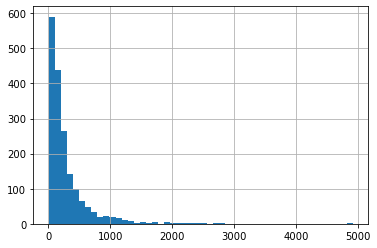

In [7]:
# how long are each reply(message)
replies_df['reply'].str.len().hist(bins=50)

In [8]:
replies_df['reply'].str.split()

0       [Hi, stao,, the, response, of, the, T64fx, cha...
1                                [I'm, also, interested.]
2       [maybe, TTD, can, start, reviewing, some, sp, ...
3       [I, do, not, know, if, tabletennisdaily, can, ...
4       [I`ve, used, to, play, for, several, months, w...
                              ...                        
1817    [I'm, pretty, sure, the, Chinese, players, fav...
1818    [I, think, the, tenergy, rubber, is, over-rate...
1819    [try, haifu, whale, and, shark., they, are, li...
1820    [Thanks, for, your, reply!, I've, used, haifu,...
1821    [Non-tacky, rubbers, are, better, for, RPB, us...
Name: reply, Length: 1809, dtype: object

In [9]:
replies_df['reply'][0].split()

['Hi',
 'stao,',
 'the',
 'response',
 'of',
 'the',
 'T64fx',
 'changes',
 'depending',
 'on',
 'the',
 'the',
 'blade',
 "you're",
 'using.',
 'Usually',
 'I',
 'have',
 'a',
 'Primorac',
 'Carbon',
 'and',
 "I'm",
 'offensive',
 'player',
 'with',
 'agressive',
 'top',
 'spin.',
 'I',
 'used',
 'T05fx',
 'before',
 'and',
 'I',
 'really',
 'appreciate',
 'the',
 'general',
 'feeling',
 'of',
 'the',
 'T64fx,',
 'which',
 'is',
 'more',
 'softer',
 'but',
 'faster',
 'than',
 '05fx.',
 'On',
 'the',
 'other',
 'hand',
 'less',
 'spin',
 'too.',
 'Very',
 'good',
 'for',
 'block.',
 'For',
 'my',
 'style',
 'I',
 'really',
 'prefer',
 'T64fx',
 'than',
 'T05fx',
 '(',
 'always',
 '2.1',
 'for',
 'me).I',
 'bought',
 'recently',
 'the',
 'complete',
 'Garaydia',
 'family',
 'to',
 'see',
 'if',
 'from',
 'the',
 'blade',
 'I',
 'had',
 'a',
 'possibility',
 'to',
 'improve',
 'my',
 'skills',
 'and',
 'I',
 'would',
 'say',
 'no.With',
 'the',
 'ALC',
 'it',
 'is',
 'too',
 'soft',
 'a

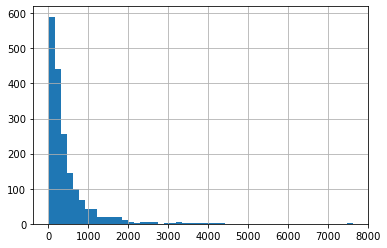

In [10]:
replies_df['reply'].str.split().map(lambda x: np.mean(len(str(x)))).hist(bins=50)


# want to count how many words there are on average for each message
# but is this right?

In [11]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
threads = replies_df['reply'].str.split()
threads = threads.values.tolist()

print(threads[:1])


[['Hi', 'stao,', 'the', 'response', 'of', 'the', 'T64fx', 'changes', 'depending', 'on', 'the', 'the', 'blade', "you're", 'using.', 'Usually', 'I', 'have', 'a', 'Primorac', 'Carbon', 'and', "I'm", 'offensive', 'player', 'with', 'agressive', 'top', 'spin.', 'I', 'used', 'T05fx', 'before', 'and', 'I', 'really', 'appreciate', 'the', 'general', 'feeling', 'of', 'the', 'T64fx,', 'which', 'is', 'more', 'softer', 'but', 'faster', 'than', '05fx.', 'On', 'the', 'other', 'hand', 'less', 'spin', 'too.', 'Very', 'good', 'for', 'block.', 'For', 'my', 'style', 'I', 'really', 'prefer', 'T64fx', 'than', 'T05fx', '(', 'always', '2.1', 'for', 'me).I', 'bought', 'recently', 'the', 'complete', 'Garaydia', 'family', 'to', 'see', 'if', 'from', 'the', 'blade', 'I', 'had', 'a', 'possibility', 'to', 'improve', 'my', 'skills', 'and', 'I', 'would', 'say', 'no.With', 'the', 'ALC', 'it', 'is', 'too', 'soft', 'and', 'slow', 'for', 'me,', 'with', 'the', 'T5000', 'too', 'fast', 'and', 'the', 'ZLC', 'has', 'a', 'softer

In [13]:
corpus=[]

for thread in threads:
    for word in thread:
        corpus.append(word)

print(corpus[:5])

['Hi', 'stao,', 'the', 'response', 'of']


In [14]:
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [15]:
dic

defaultdict(int,
            {'the': 3665,
             'of': 1285,
             'on': 925,
             "you're": 43,
             'have': 663,
             'a': 2071,
             'and': 2276,
             'with': 1100,
             'before': 42,
             'which': 153,
             'is': 1908,
             'more': 607,
             'but': 743,
             'than': 405,
             'other': 115,
             'for': 1198,
             'my': 705,
             'to': 2141,
             'if': 382,
             'from': 387,
             'had': 97,
             'it': 1265,
             'too': 150,
             'has': 273,
             'be': 524,
             'an': 160,
             'about': 300,
             'between': 69,
             'those': 53,
             'as': 530,
             'after': 88,
             'me': 192,
             'or': 452,
             'can': 382,
             'some': 179,
             'do': 251,
             'not': 541,
             'they': 229,
             'that

<BarContainer object of 10 artists>

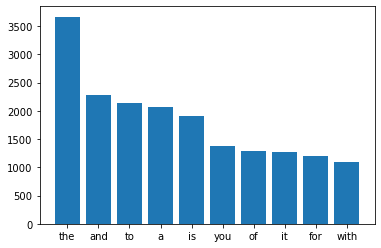

In [16]:
# looking at the top stop words

import matplotlib.pyplot as plt

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [17]:
# looking at the top word that is NOT a stopword

from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)

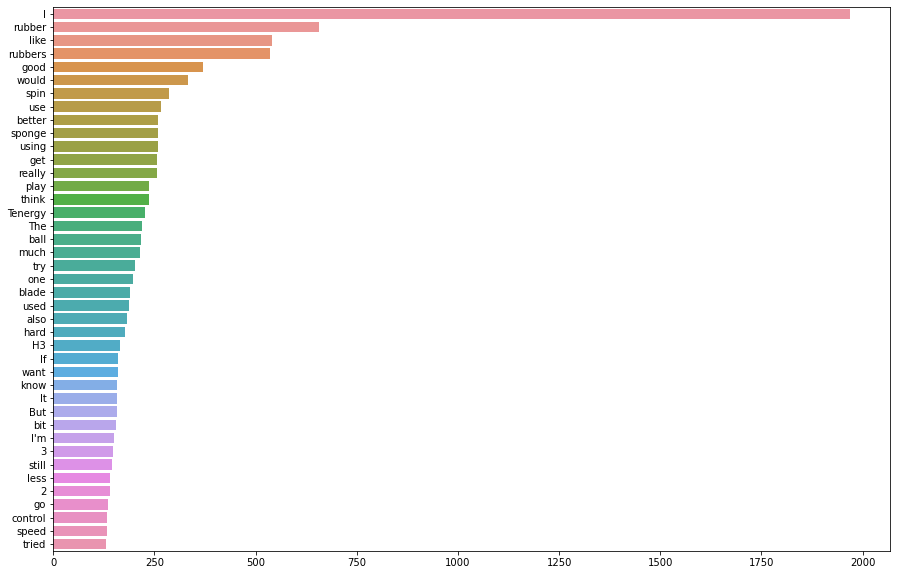

In [18]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=y,y=x)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus=replies_df['reply'], n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:50]

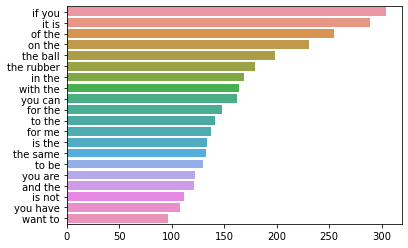

In [20]:
# looking at top bigram

top_n_bigrams=get_top_ngram(replies_df['reply'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

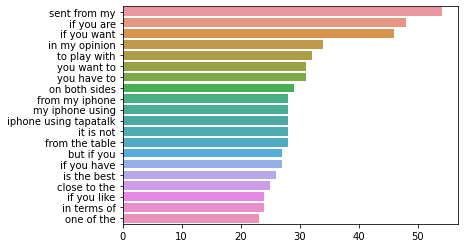

In [21]:
# looking at top trigram

top_tri_grams=get_top_ngram(replies_df['reply'],3)[:20]
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

# LDA

In [22]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in replies_df['reply']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(replies_df)

In [23]:
corpus[:1]

[['stao',
  'response',
  'T64fx',
  'change',
  'depending',
  'blade',
  "'re",
  'using',
  'Usually',
  'Primorac',
  'Carbon',
  'offensive',
  'player',
  'agressive',
  'top',
  'spin',
  'used',
  'T05fx',
  'really',
  'appreciate',
  'general',
  'feeling',
  'T64fx',
  'softer',
  'faster',
  '05fx',
  'hand',
  'le',
  'spin',
  'Very',
  'good',
  'block',
  'For',
  'style',
  'really',
  'prefer',
  'T64fx',
  'T05fx',
  'always',
  '2.1',
  'bought',
  'recently',
  'complete',
  'Garaydia',
  'family',
  'see',
  'blade',
  'possibility',
  'improve',
  'skill',
  'would',
  'say',
  'no.With',
  'ALC',
  'soft',
  'slow',
  'T5000',
  'fast',
  'ZLC',
  'softer',
  'touch',
  'could',
  'alternative',
  'truly',
  'amazed',
  'huge',
  'difference',
  'blades.To',
  'finish',
  'currently',
  'glueing',
  'Dignics',
  'Primorac',
  'carbon',
  'test',
  'season',
  'ended',
  'training',
  "'ll",
  'see',
  'fit',
  'test',
  'garaydia',
  'T5000',
  'Garaydia',
  'ZL

In [24]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.033*"rubber" + 0.010*"n\'t" + 0.009*"good" + 0.009*"like" + 0.007*"would" + 0.006*"blade" + 0.006*"Tenergy" + 0.006*"better" + 0.006*"sponge" + 0.006*"play"'),
 (1,
  '0.035*"rubber" + 0.012*"like" + 0.011*"spin" + 0.010*"n\'t" + 0.008*"sponge" + 0.008*"good" + 0.008*"ball" + 0.007*"really" + 0.006*"blade" + 0.006*"play"'),
 (2,
  '0.009*"like" + 0.008*"blade" + 0.007*"n\'t" + 0.007*"sponge" + 0.007*"think" + 0.006*"..." + 0.006*"rubber" + 0.005*"would" + 0.005*"MX-P" + 0.005*"one"'),
 (3,
  '0.021*"rubber" + 0.008*"like" + 0.007*"spin" + 0.007*"using" + 0.007*"..." + 0.007*"good" + 0.006*"DHS" + 0.006*"would" + 0.006*"get" + 0.005*"one"')]

- not sure how helpful LDA is

# Wordcloud

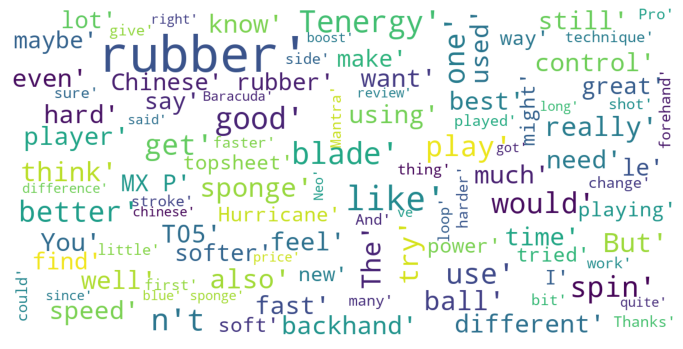

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data,max_words=100):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

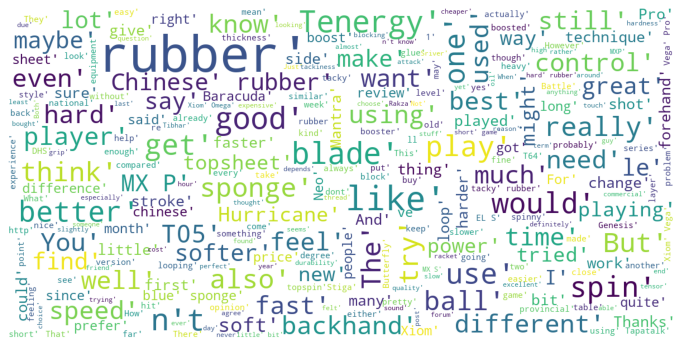

In [29]:
show_wordcloud(corpus,500)